# Data processing

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os

In [17]:
sz = 128 

# Initialising our first Convolution network model 

In [30]:
classifier = Sequential() 

In [31]:
# First convolution network and pooling


# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))
#classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
#classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())


# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2



In [32]:
classifier.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 28800)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [33]:
from keras.preprocessing.image import ImageDataGenerator


In [65]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

sz=128


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('ProcessedData128/train',
                                                 target_size=(sz, sz),
                                                 batch_size=24,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('ProcessedData128/test',
                                            target_size=(sz , sz),
                                            batch_size=27,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


Found 648 images belonging to 27 classes.
Found 162 images belonging to 27 classes.


In [35]:
classifier.fit(
        training_set,
        epochs=20,
        verbose=1, 
        validation_data=test_set,
)# No of images in test set

Epoch 1/20
27/27 [==============================] - 5s 154ms/step - loss: 3.3553 - accuracy: 0.0293 - val_loss: 3.2760 - val_accuracy: 0.1049
Epoch 2/20
27/27 [==============================] - 4s 146ms/step - loss: 3.2308 - accuracy: 0.0741 - val_loss: 3.0516 - val_accuracy: 0.1728
Epoch 3/20
27/27 [==============================] - 4s 139ms/step - loss: 2.8675 - accuracy: 0.1914 - val_loss: 1.8888 - val_accuracy: 0.6358
Epoch 4/20
27/27 [==============================] - 4s 139ms/step - loss: 2.2172 - accuracy: 0.3256 - val_loss: 0.8713 - val_accuracy: 0.8951
Epoch 5/20
27/27 [==============================] - 4s 140ms/step - loss: 1.5602 - accuracy: 0.5355 - val_loss: 0.3961 - val_accuracy: 0.9321
Epoch 6/20
27/27 [==============================] - 4s 137ms/step - loss: 1.2539 - accuracy: 0.6373 - val_loss: 0.3240 - val_accuracy: 0.9074
Epoch 7/20
27/27 [==============================] - 4s 136ms/step - loss: 1.0150 - accuracy: 0.7114 - val_loss: 0.2038 - val_accuracy: 0.9383
Epoch 

In [36]:
classifier.evaluate(test_set)

27/27 [==============================] - 0s 10ms/step - loss: 0.2647 - accuracy: 0.9691


[0.26471492648124695, 0.9691358208656311]

In [38]:
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/models/SignDetection.h5' 
classifier.save(path)

# Loading saved model

In [6]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

sz=128


test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('ProcessedData128/train',
                                                 target_size=(sz, sz),
                                                 batch_size=24,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('ProcessedData128/test',
                                            target_size=(sz , sz),
                                            batch_size=6,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


Found 648 images belonging to 27 classes.
Found 162 images belonging to 27 classes.


In [34]:
from tensorflow.keras.models import load_model
path = 'E:/MachineLearning/SignDetectionSystemUsingMachineLearning/models/SignDetection.h5' 


savedModel=load_model(path)

In [8]:
savedModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 28800)             0         
                                                                 
 dense_12 (Dense)            (None, 128)              

In [9]:
savedModel.evaluate(test_set)

27/27 [==============================] - 1s 12ms/step - loss: 0.2647 - accuracy: 0.9691


[0.26471492648124695, 0.9691358208656311]

# Let us predict our output and visualise it

In [66]:
predicted = savedModel.predict(test_set)

6/6 [==============================] - 0s 33ms/step


In [67]:
predicted

array([[2.87021373e-22, 9.88655131e-08, 6.01632513e-13, ...,
        1.45482888e-17, 1.61100917e-21, 2.90460605e-18],
       [1.46644772e-04, 4.70096184e-09, 3.99430570e-13, ...,
        1.02810766e-07, 5.86124171e-09, 8.42133377e-11],
       [1.05477261e-16, 1.63120586e-10, 6.11653228e-11, ...,
        3.46650327e-20, 1.74185108e-20, 2.08537987e-15],
       ...,
       [4.61386083e-13, 1.27755930e-14, 7.33509919e-09, ...,
        1.82705837e-10, 9.99997735e-01, 1.48094384e-10],
       [5.91800674e-23, 1.04226632e-22, 2.97015432e-18, ...,
        4.27967170e-23, 9.79803570e-28, 1.00000000e+00],
       [9.16548792e-09, 1.90186200e-11, 1.20065557e-09, ...,
        3.24666093e-11, 7.34663814e-08, 1.50621833e-12]], dtype=float32)

In [68]:
test_set


In [69]:
test_set[0]

(array([[[[0.9960785 ],
          [1.        ],
          [1.        ],
          ...,
          [1.        ],
          [0.98823535],
          [1.        ]],
 
         [[0.9921569 ],
          [1.        ],
          [0.98823535],
          ...,
          [0.9960785 ],
          [1.        ],
          [0.98823535]],
 
         [[1.        ],
          [1.        ],
          [1.        ],
          ...,
          [1.        ],
          [1.        ],
          [1.        ]],
 
         ...,
 
         [[0.9843138 ],
          [1.        ],
          [1.        ],
          ...,
          [1.        ],
          [0.9960785 ],
          [1.        ]],
 
         [[1.        ],
          [0.9960785 ],
          [0.9921569 ],
          ...,
          [1.        ],
          [1.        ],
          [1.        ]],
 
         [[0.9960785 ],
          [0.9960785 ],
          [1.        ],
          ...,
          [0.9960785 ],
          [1.        ],
          [1.        ]]],
 
 
        [

In [70]:
import matplotlib.pyplot as plt # for showing images
import numpy as np

In [71]:
predicted

array([[2.87021373e-22, 9.88655131e-08, 6.01632513e-13, ...,
        1.45482888e-17, 1.61100917e-21, 2.90460605e-18],
       [1.46644772e-04, 4.70096184e-09, 3.99430570e-13, ...,
        1.02810766e-07, 5.86124171e-09, 8.42133377e-11],
       [1.05477261e-16, 1.63120586e-10, 6.11653228e-11, ...,
        3.46650327e-20, 1.74185108e-20, 2.08537987e-15],
       ...,
       [4.61386083e-13, 1.27755930e-14, 7.33509919e-09, ...,
        1.82705837e-10, 9.99997735e-01, 1.48094384e-10],
       [5.91800674e-23, 1.04226632e-22, 2.97015432e-18, ...,
        4.27967170e-23, 9.79803570e-28, 1.00000000e+00],
       [9.16548792e-09, 1.90186200e-11, 1.20065557e-09, ...,
        3.24666093e-11, 7.34663814e-08, 1.50621833e-12]], dtype=float32)

In [72]:
predicted_classes = np.argmax(predicted, axis=1)
class_names = list(training_set.class_indices.keys())
print(class_names)

# Map the indices to class names
predicted_class_names = [class_names[idx] for idx in predicted_classes]

print(predicted_class_names)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'blank']
['F', 'M', 'E', 'K', 'B', 'N', 'I', 'D', 'O', 'E', 'B', 'B', 'Q', 'D', 'I', 'B', 'Y', 'Q', 'A', 'K', 'M', 'L', 'Q', 'X', 'O', 'O', 'Y', 'N', 'F', 'A', 'A', 'X', 'A', 'R', 'J', 'B', 'L', 'I', 'M', 'N', 'I', 'P', 'P', 'U', 'U', 'K', 'D', 'V', 'N', 'D', 'C', 'Q', 'J', 'L', 'blank', 'C', 'R', 'R', 'U', 'M', 'Q', 'A', 'P', 'W', 'T', 'P', 'blank', 'G', 'A', 'F', 'X', 'L', 'X', 'G', 'G', 'U', 'T', 'F', 'W', 'I', 'V', 'Y', 'K', 'blank', 'Z', 'T', 'A', 'M', 'R', 'D', 'F', 'S', 'H', 'J', 'G', 'T', 'Q', 'K', 'J', 'W', 'blank', 'G', 'T', 'Y', 'S', 'S', 'R', 'P', 'S', 'D', 'S', 'R', 'V', 'E', 'L', 'W', 'E', 'X', 'Z', 'A', 'C', 'E', 'Q', 'W', 'U', 'O', 'O', 'B', 'G', 'Y', 'C', 'F', 'K', 'N', 'T', 'blank', 'J', 'U', 'M', 'W', 'Y', 'X', 'O', 'N', 'Q', 'L', 'V', 'J', 'C', 'V', 'A', 'E', 'P', 'V', 'I', 'Z', 'Z', 'Z', 'C', 'Z', 'blank', 'S']


In [73]:
print(len(predicted))
print(len(test_set))

162
6


In [74]:
val = [] 
for i in range(len(predicted)): 
    val1 = np.argmax(predicted[i])  # Use index i to access each element of predicted
    val.append(val1)

print(val)
len(predicted)


[5, 12, 4, 10, 1, 13, 8, 3, 14, 4, 1, 1, 16, 3, 8, 1, 24, 16, 0, 10, 12, 11, 16, 23, 14, 14, 24, 13, 5, 0, 0, 23, 0, 17, 9, 1, 11, 8, 12, 13, 8, 15, 15, 20, 20, 10, 3, 21, 13, 3, 2, 16, 9, 11, 26, 2, 17, 17, 20, 12, 16, 0, 15, 22, 19, 15, 26, 6, 0, 5, 23, 11, 23, 6, 6, 20, 19, 5, 22, 8, 21, 24, 10, 26, 25, 19, 0, 12, 17, 3, 5, 18, 7, 9, 6, 19, 16, 10, 9, 22, 26, 6, 19, 24, 18, 18, 17, 15, 18, 3, 18, 17, 21, 4, 11, 22, 4, 23, 25, 0, 2, 4, 16, 22, 20, 14, 14, 1, 6, 24, 2, 5, 10, 13, 19, 26, 9, 20, 12, 22, 24, 23, 14, 13, 16, 11, 21, 9, 2, 21, 0, 4, 15, 21, 8, 25, 25, 25, 2, 25, 26, 18]


162

In [75]:
np.argmax(predicted[0])

5

[ 0  0  0  0  0  0  1  1  1  1  1  1  2  2  2  2  2  2  3  3  3  3  3  3
  4  4  4  4  4  4  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7
  8  8  8  8  8  8  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11
 12 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15
 16 16 16 16 16 16 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19 19
 20 20 20 20 20 20 21 21 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23
 24 24 24 24 24 24 25 25 25 25 25 25 26 26 26 26 26 26]
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'blank']
2
1/1 [==============================] - 0s 47ms/step


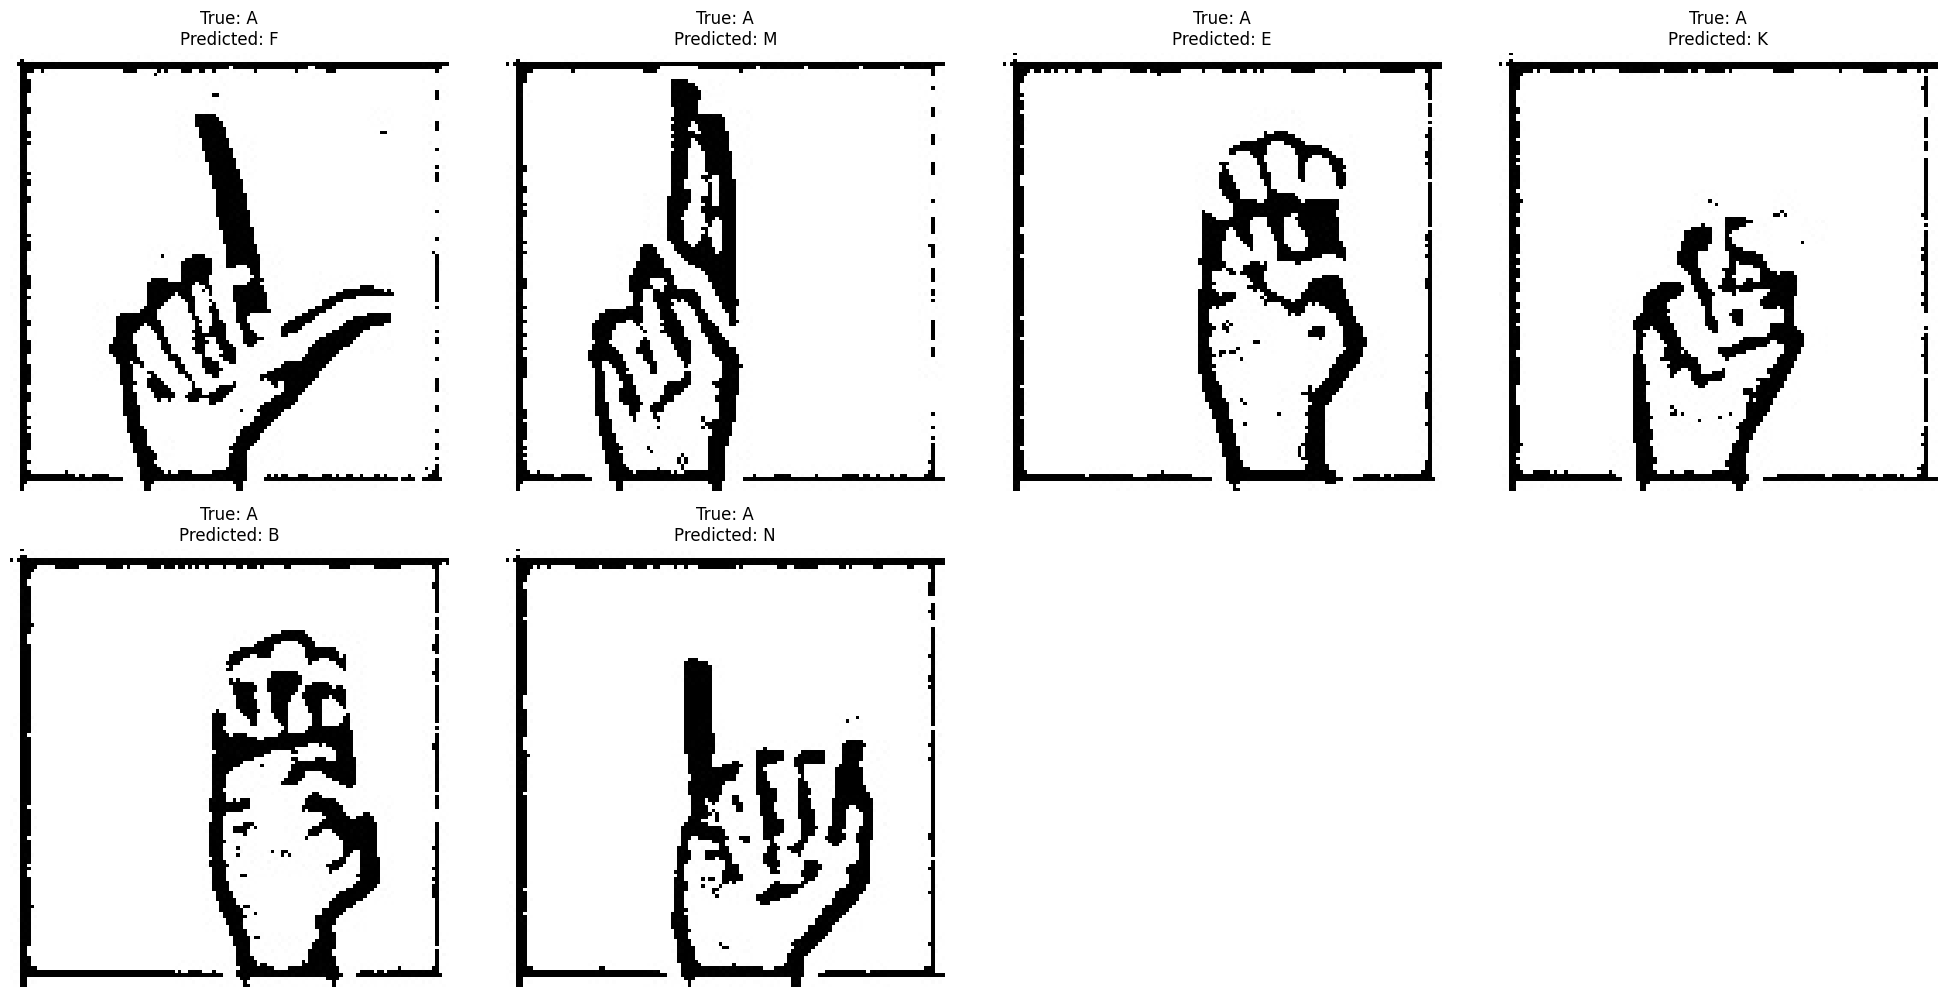

In [76]:
true_value = test_set.classes
print(true_value)
class_true_labels = list(test_set.class_indices.keys())
print(class_labels)

j=1
# plt.imshow(test_set[0][0][5], cmap = 'Greys')
print(len(test_set[0]))
val = savedModel.predict(test_set[0][0])
val


plt.figure(figsize=(20, 20))
for i in range(len(test_set)):
    if i >= 27: 
        continue
    plt.subplot(4, 4, i+1)
    plt.imshow(test_set[0][0][i], cmap='gray')  # Display the first image from each batch
    plt.title('True: {}\nPredicted: {}'.format(class_labels[true_value[i]], class_labels[np.argmax(predicted[i])]))
    plt.axis('off')
plt.tight_layout()
plt.show()
